# HSBC

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
import warnings
warnings.filterwarnings('ignore')

In [71]:
HSBC = pd.DataFrame()
HSBC = pd.read_excel('Data2_Ex4.xlsx', sheet_name = '0005.HK')

In [72]:
HSBC.head()

,Date,Open,High,Low,Close,Price,Volume
0,2000-01-03,111.0,111.5,107.50,108.0,53.067974,3908164.0
1,2000-01-04,106.0,106.5,105.00,106.0,52.085232,6895378.0
2,2000-01-05,101.0,102.0,99.50,100.5,49.382702,14657098.0
3,2000-01-06,101.0,102.0,96.25,97.0,47.662907,10632084.0
4,2000-01-07,98.5,101.0,97.50,100.5,49.382702,8368286.0


In [73]:
HSBC.isnull().sum()

Date      0
Open      2
High      2
Low       2
Close     2
Price     2
Volume    2
dtype: int64

In [74]:
HSBC = HSBC.interpolate(method='linear', axis=0, limit=None)

In [75]:
HSBC.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Price     0
Volume    0
dtype: int64

In [76]:
HSBC['Date'] = pd.to_datetime(HSBC['Date'])
HSBC = HSBC.set_index(HSBC['Date'])

df = pd.DataFrame()
df['Price'] = HSBC['Price']

train_HSBC = df['2000-01-03':'2022-12-31']
test_HSBC  = df['2023-01-01': ]

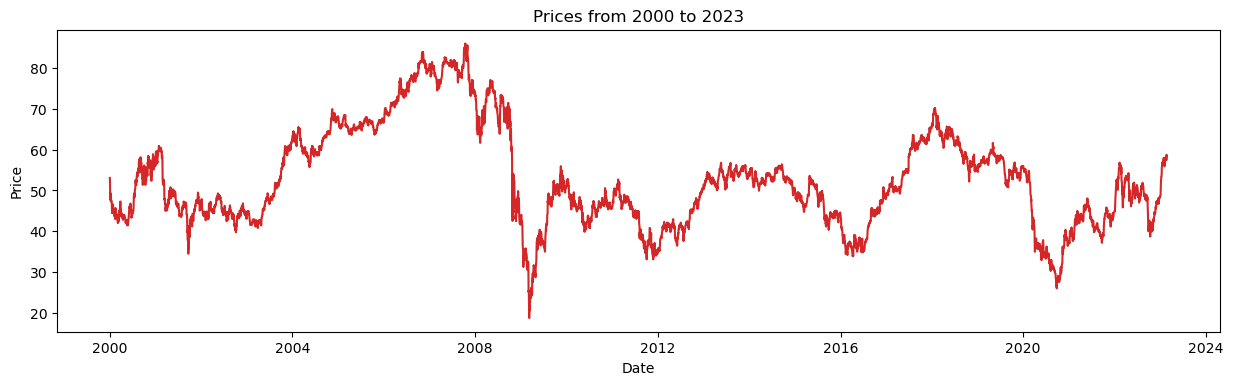

In [77]:
import matplotlib.pyplot as plt 
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Price', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_df(HSBC, x=HSBC['Date'], y=HSBC['Price'], title='Prices from 2000 to 2023')

In [78]:
#Test to see if data is stationary

from statsmodels.tsa.stattools import adfuller

print("p-value:", adfuller(df.dropna())[1])

p-value: 0.12772105789863197


In [79]:
# p-value was greater than 0.05, so not stationary. We perform differentiation to achieve stationary state of data

diff_1 = df.diff().dropna()
print("p-value:", adfuller(diff_1.dropna())[1])

p-value: 0.0


ACF and PACF plots


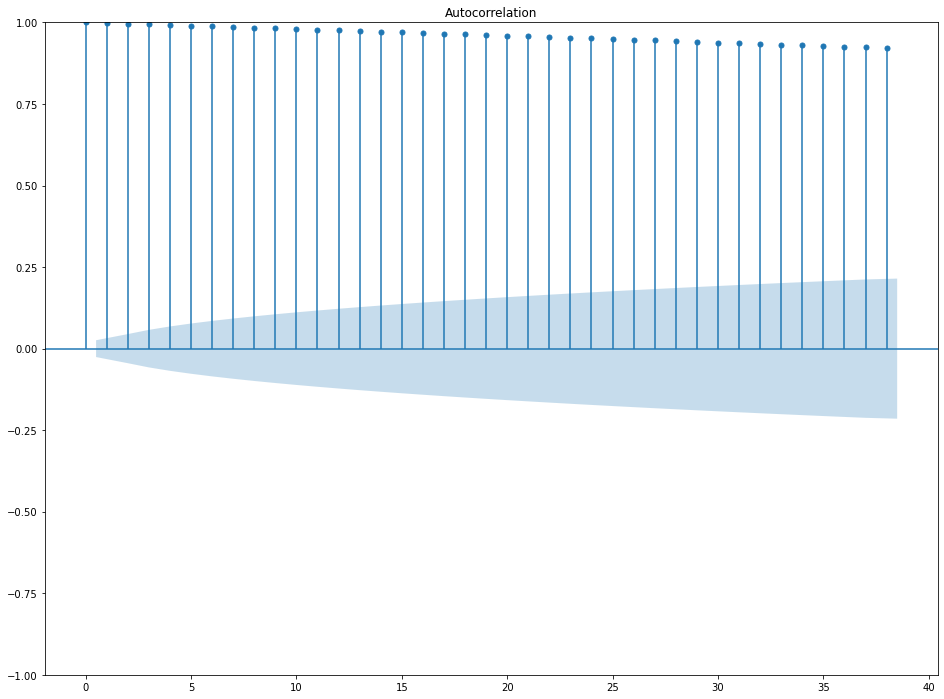

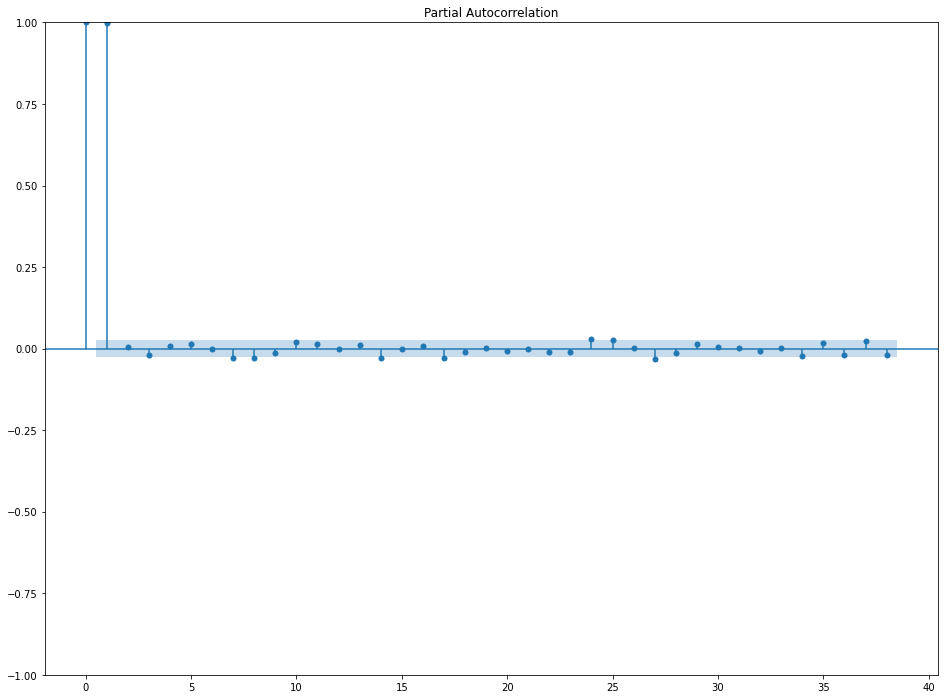

In [80]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df) 

from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df, method = "ols")

print("ACF and PACF plots")

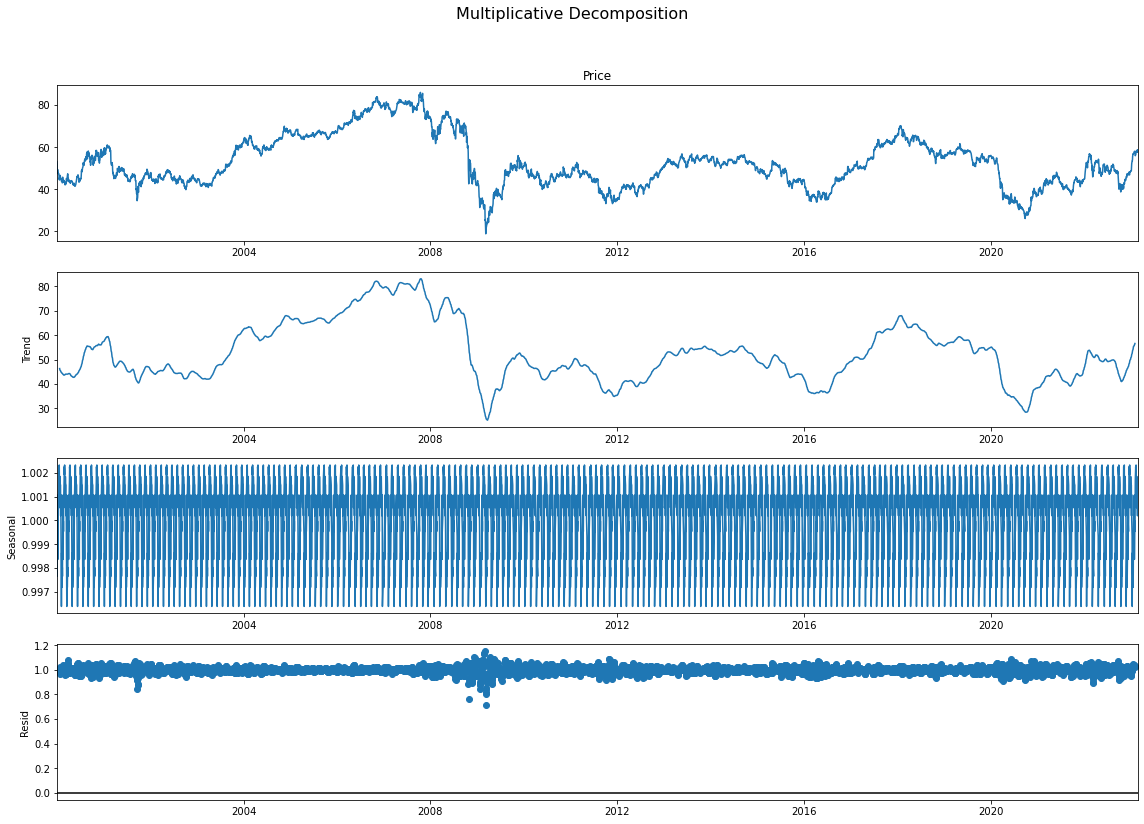

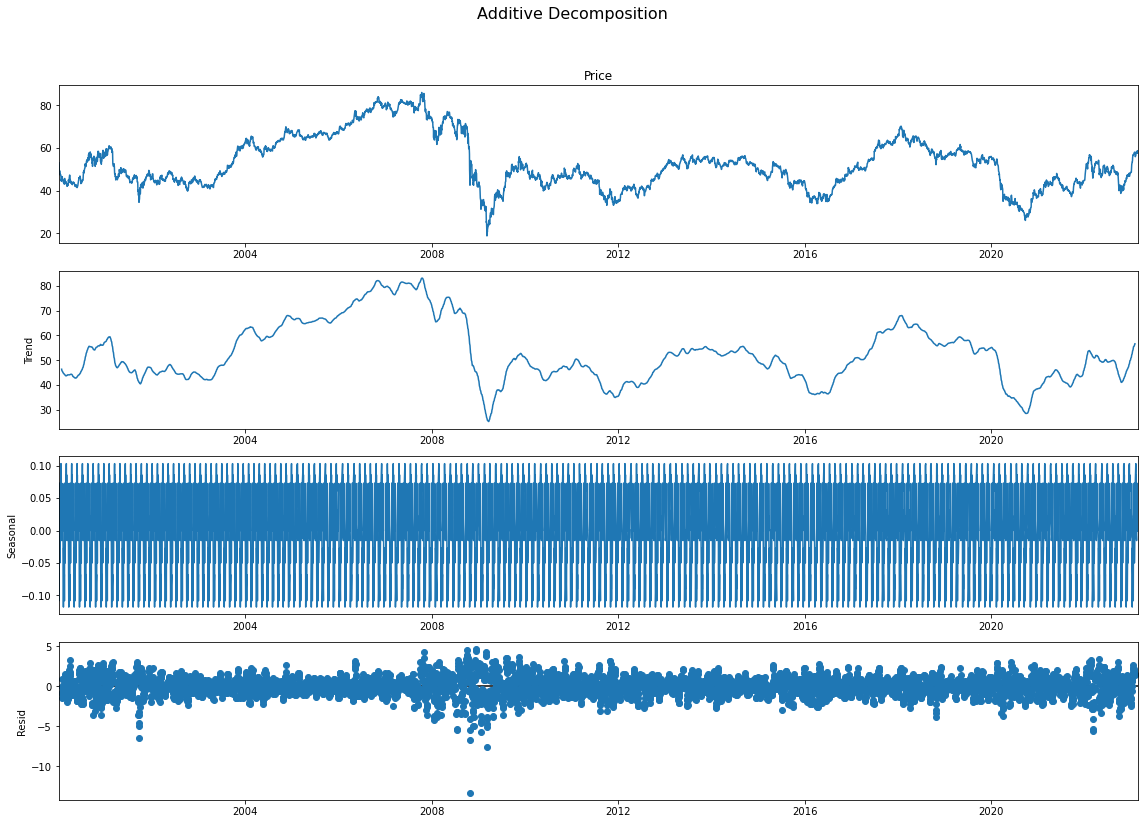

In [81]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(df['Price'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df['Price'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

In [14]:
pip install pmdarima --user

Note: you may need to restart the kernel to use updated packages.


In [15]:
import pmdarima as pmd

def am(timeseriesarray):
    a_model = pmd.auto_arima(timeseriesarray,
                              test="adf",
                              trace=True)
    return a_model

In [16]:
arima = am(train_HSBC.Price)
arima.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=17.73 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12844.022, Time=1.34 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12845.728, Time=1.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=12845.737, Time=1.54 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12842.029, Time=0.27 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=12846.962, Time=9.68 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 31.866 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5750
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -6420.014
Date:                Tue, 07 Mar 2023   AIC                          12842.029
Time:                        08:26:23   BIC                          12848.686
Sample:                             0   HQIC                         12844.346
                               - 5750                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.5464      0.004    138.065      0.000       0.539       0.554
===================================================================================
Ljung-Box (L1) (Q):                   0.29   Jarque-Bera (JB):             30500.52
Prob(Q):                              0.59   Prob(JB):                         0.00
Heteroskedasticity (H):               1.12   Skew:                            -0.36
Prob(H) (two-sided):                  0.02   Kurtosis:                        14.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [82]:
import statsmodels.api as sm
mod = sm.tsa.arima.ARIMA(train_HSBC.Price, order = (0,1,0))
results = mod.fit()
print (results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 5750
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -6420.014
Date:                Tue, 07 Mar 2023   AIC                          12842.029
Time:                        08:36:49   BIC                          12848.686
Sample:                             0   HQIC                         12844.346
                               - 5750                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.5464      0.004    138.065      0.000       0.539       0.554
Ljung-Box (L1) (Q):                   0.29   Jarque-Bera (JB):             30500.52
Prob(Q):                              0.59   Pr

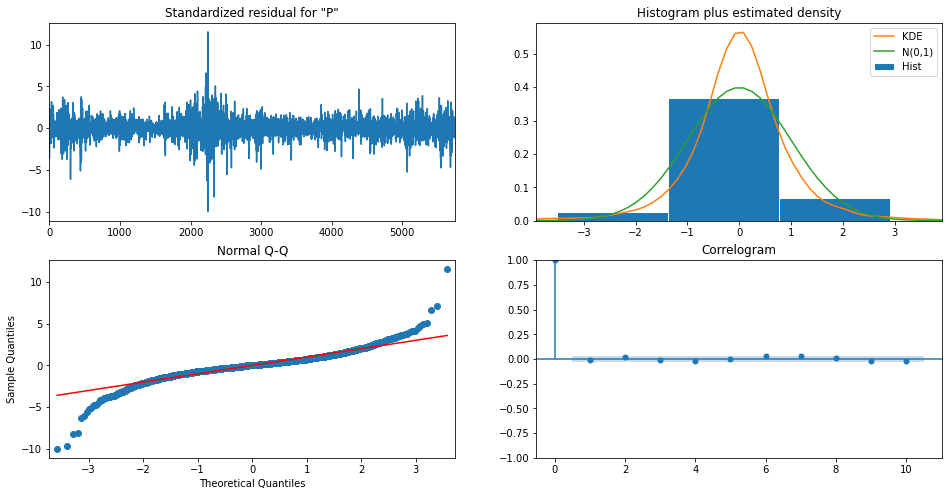

In [83]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

<AxesSubplot:xlabel='Date'>

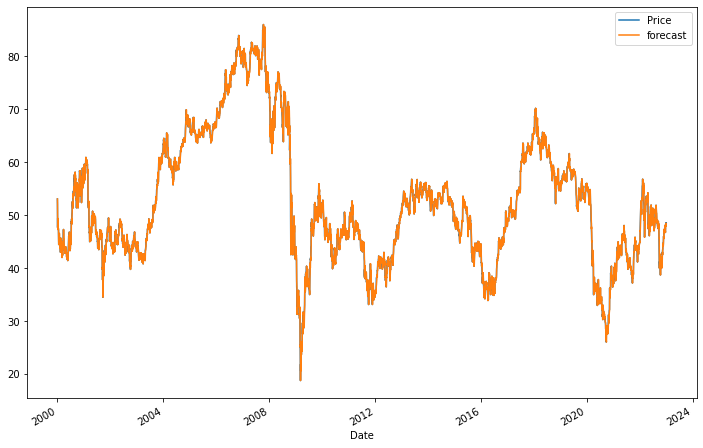

In [84]:
train_HSBC['forecast']=results.predict(start=1,end=5749, Dynamic = False)
train_HSBC[['Price','forecast']].plot(figsize=(12,8))

In [85]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))*100
    return({'mape':mape})
forecast_accuracy(train_HSBC.forecast, train_HSBC.Price)

{'mape': 1.0216792933530783}

In [86]:
fc = results.forecast(33) 
forecast_accuracy(fc.values, test_HSBC.Price)

{'mape': 13.256046881707736}

In [87]:
fc = results.get_forecast(33)  
conf = fc.conf_int(alpha=0.05)

In [88]:
conf = np.array(conf)

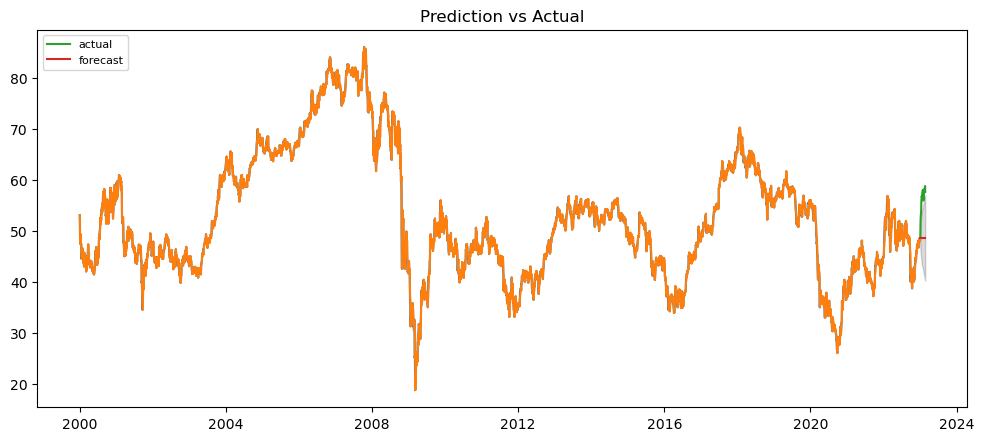

In [89]:
fc = results.forecast(33)
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_HSBC.index)
lower_series = pd.Series(conf[ : , 0], index=test_HSBC.index)
upper_series = pd.Series(conf[ : , 1], index=test_HSBC.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_HSBC)
plt.plot(test_HSBC, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Prediction vs Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

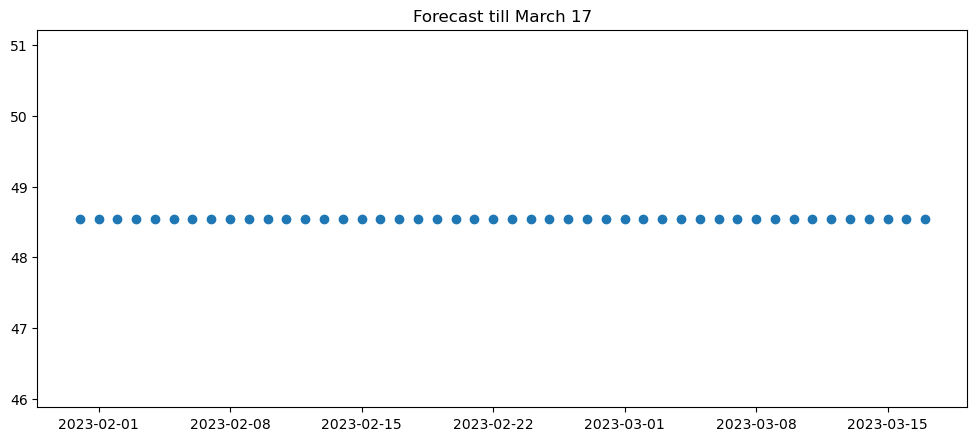

In [90]:
df = pd.DataFrame(pd.date_range(start='2023-01-31', end='2023-03-17'), columns=['Date'])
df = df.set_index(df['Date'])
FC = results.forecast(46)
FC = np.array(FC)
df['forecast'] = FC
plt.figure(figsize=(12,5), dpi=100)
plt.scatter( y = FC, x = df.index)
plt.title('Forecast till March 17')
plt.show()

In [91]:
print (df.loc['2023-03-13'].values)
print (df.loc['2023-03-15'].values)
print (df.loc['2023-03-17'].values)

[Timestamp('2023-03-13 00:00:00') 48.549999]
[Timestamp('2023-03-15 00:00:00') 48.549999]
[Timestamp('2023-03-17 00:00:00') 48.549999]


# Galaxy

In [27]:
Galaxy = pd.DataFrame()
Galaxy = pd.read_excel('Data2_Ex4.xlsx', sheet_name = '0027.HK')

In [28]:
Galaxy.isnull().sum()

Date        0
Open      164
High      164
Low       164
Close     164
Price     164
Volume    164
dtype: int64

In [29]:
Galaxy = Galaxy.interpolate(method='linear', axis=0, limit=None)

In [30]:
Galaxy.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Price     0
Volume    0
dtype: int64

In [31]:
Galaxy['Date'] = pd.to_datetime(Galaxy['Date'])
Galaxy = Galaxy.set_index(Galaxy['Date'])

df = pd.DataFrame()
df['Price'] = Galaxy['Price']

train_Galaxy = df['2000-01-03':'2022-12-31']
test_Galaxy  = df['2023-01-01': ]

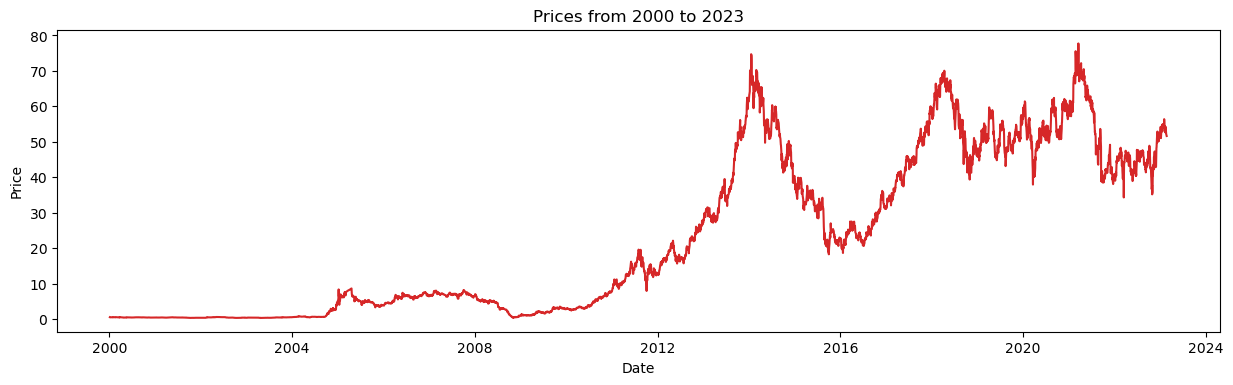

In [32]:
import matplotlib.pyplot as plt 
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Price', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_df(Galaxy, x=Galaxy['Date'], y=Galaxy['Price'], title='Prices from 2000 to 2023')

In [33]:
#Test to see if data is stationary

from statsmodels.tsa.stattools import adfuller

print("p-value:", adfuller(df.dropna())[1])

p-value: 0.7762404246415011


In [34]:
diff_1 = Galaxy.diff().Price.dropna()
print("p-value:", adfuller(diff_1.dropna())[1])

p-value: 1.6986556124343026e-29


ACF and PACF plots


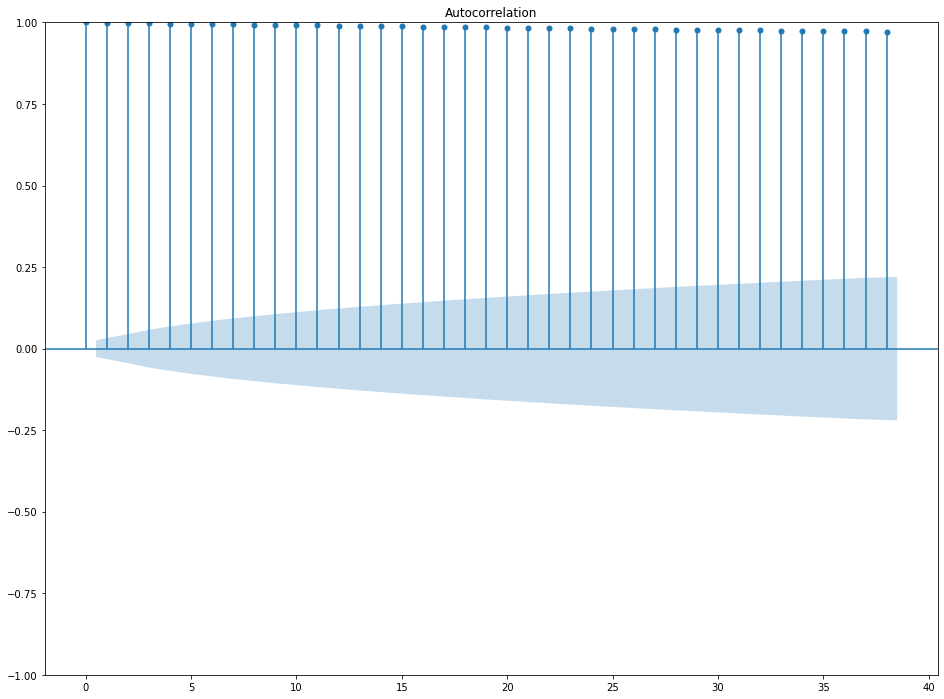

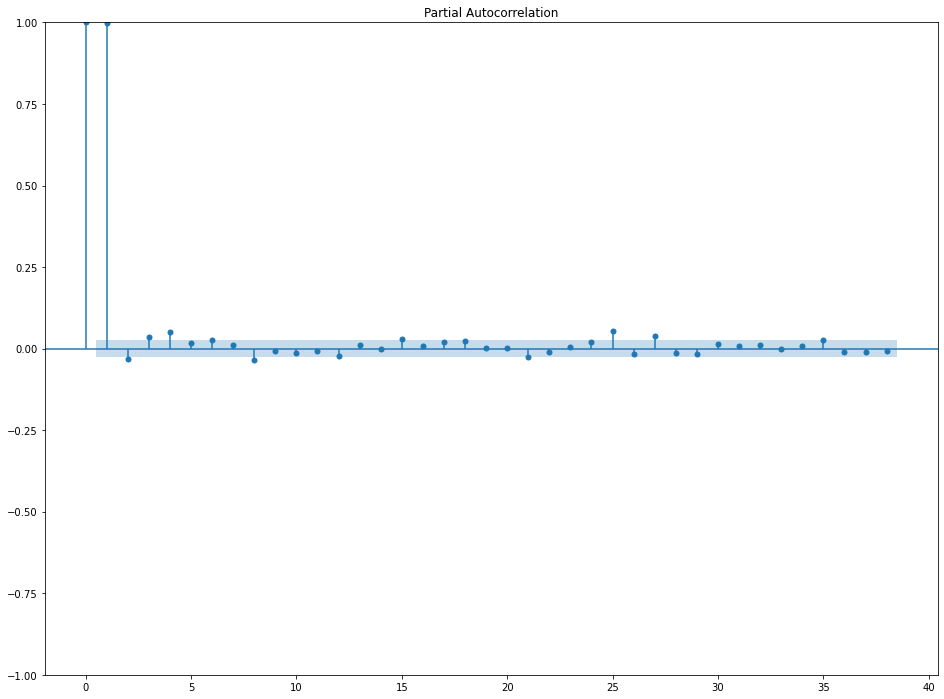

In [35]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df) 

from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df, method = "ols")

print("ACF and PACF plots")

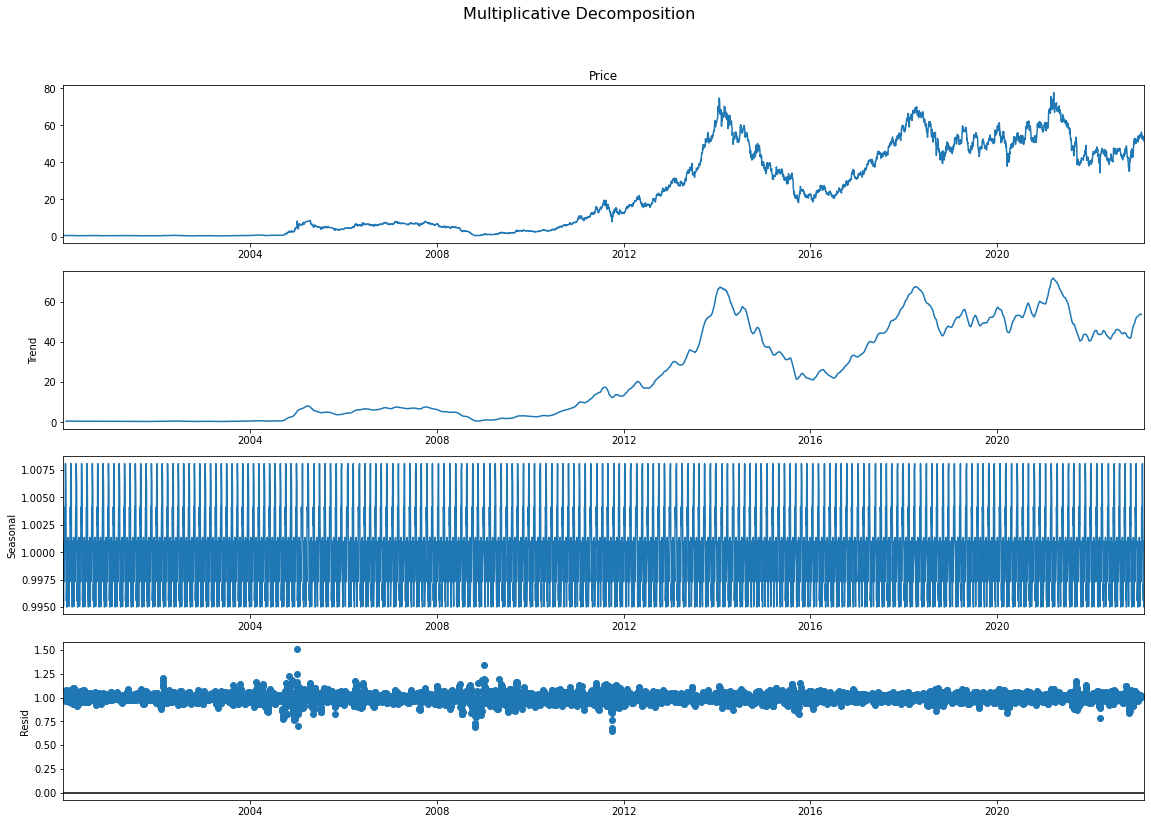

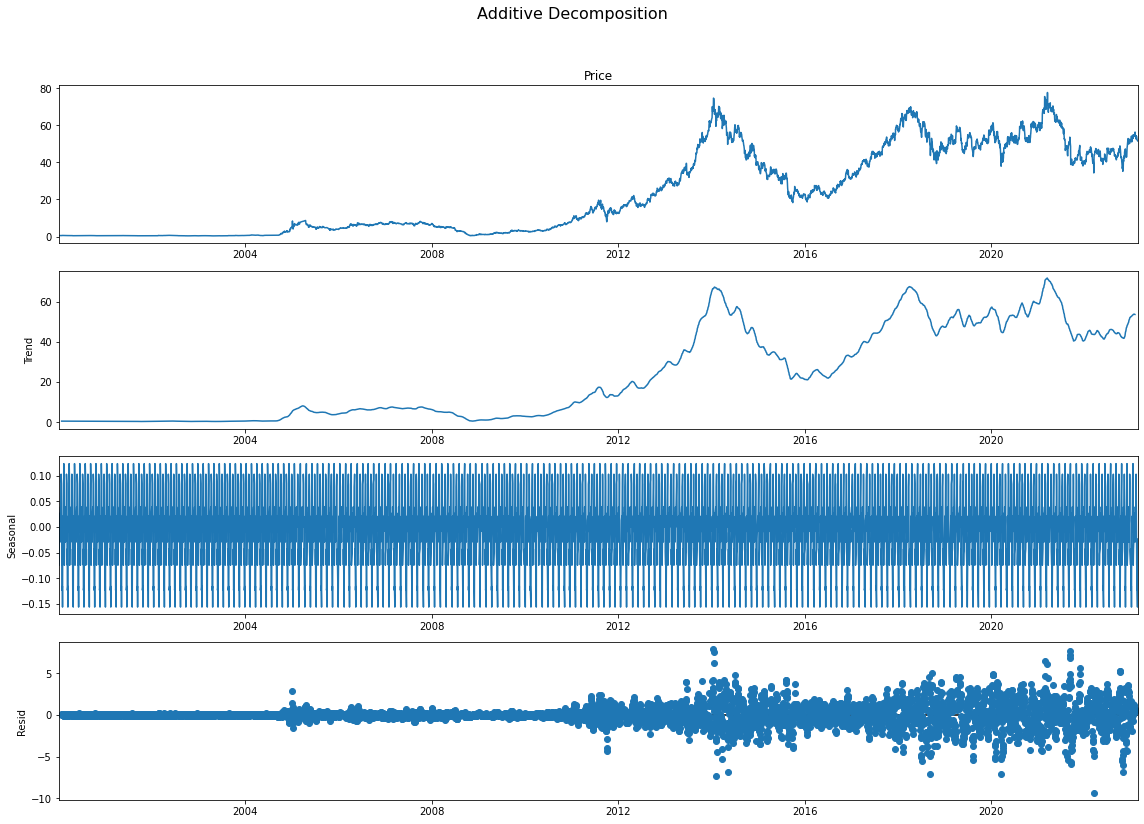

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(df['Price'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df['Price'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

In [37]:
arima = am(train_Galaxy.Price)
arima.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=13518.674, Time=23.55 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13554.262, Time=1.84 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13550.174, Time=1.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=13549.756, Time=1.54 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13552.995, Time=0.32 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=13534.802, Time=7.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=13533.070, Time=7.33 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=13519.705, Time=21.78 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=13516.501, Time=24.79 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=13530.903, Time=3.23 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=13517.785, Time=26.95 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=13534.888, Time=12.85 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=13532.895, Time=9.87 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=13517.435, Time=34.00 sec
 ARIMA(2,1,3)

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5749
Model:               SARIMAX(2, 1, 3)   Log Likelihood               -6751.557
Date:                Tue, 07 Mar 2023   AIC                          13515.114
Time:                        08:30:56   BIC                          13555.054
Sample:                             0   HQIC                         13529.014
                               - 5749                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5774      0.011    146.514      0.000       1.556       1.598
ar.L2         -0.9525      0.010    -91.638      0.000      -0.973      -0.932
ma.L1         -1.5491      0.013   -118.225      0.000      -1.575      -1.523
ma.L2          0.8904      0.017     53.686      0.000       0.858       0.923
ma.L3          0.0291      0.008      3.859      0.000       0.014       0.044
sigma2         0.6134      0.005    135.517      0.000       0.605       0.622
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             29605.58
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):              69.78   Skew:                            -0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [92]:
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
mod = sm.tsa.arima.ARIMA(train_Galaxy.Price, order = (2,1,3))
results = mod.fit()
print (results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 5749
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -6751.557
Date:                Tue, 07 Mar 2023   AIC                          13515.114
Time:                        09:13:48   BIC                          13555.054
Sample:                             0   HQIC                         13529.014
                               - 5749                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5774      0.011    146.514      0.000       1.556       1.598
ar.L2         -0.9525      0.010    -91.638      0.000      -0.973      -0.932
ma.L1         -1.5491      0.013   -118.225      0.0

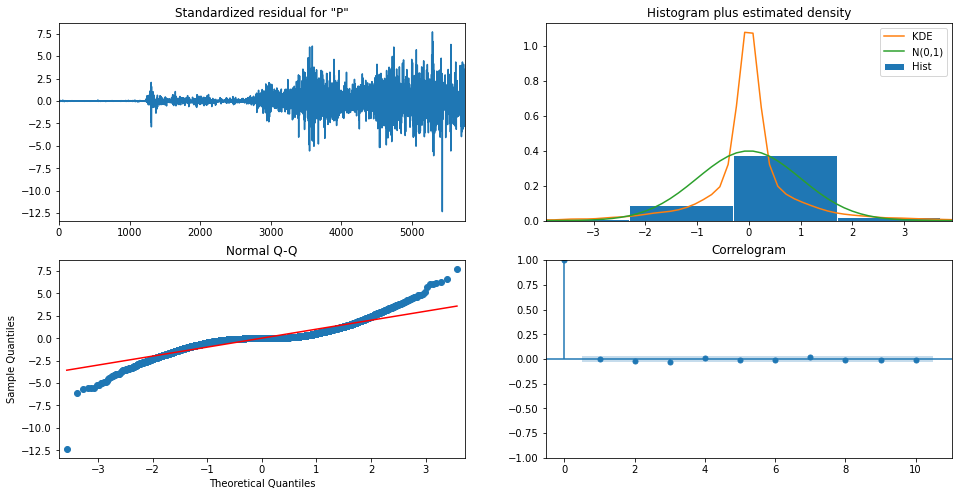

In [39]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

<AxesSubplot:xlabel='Date'>

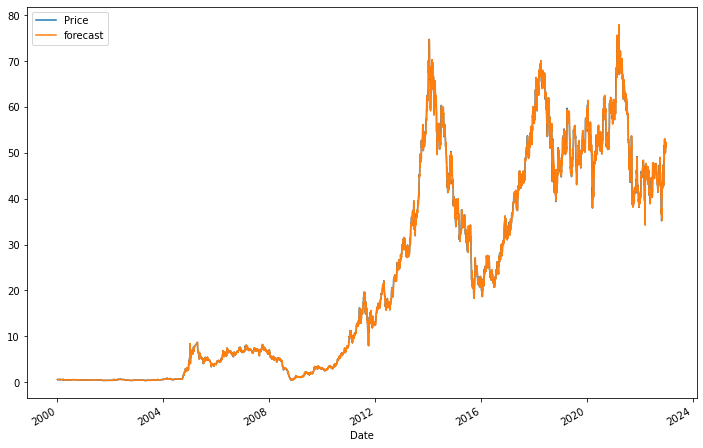

In [40]:
train_Galaxy['forecast']=results.predict(start=1,end=5748, Dynamic = False)
train_Galaxy[['Price','forecast']].plot(figsize=(12,8))

In [41]:
forecast_accuracy(train_Galaxy.forecast, train_Galaxy.Price)

{'mape': 2.165622355765563}

In [93]:
import warnings
warnings.filterwarnings('ignore')
fc = results.forecast(33) 
forecast_accuracy(fc.values, test_Galaxy.Price)

{'mape': 4.201882733827262}

In [99]:
fc = results.get_forecast(33)  
conf = fc.conf_int(alpha=0.05)

In [100]:
conf = np.array(conf)

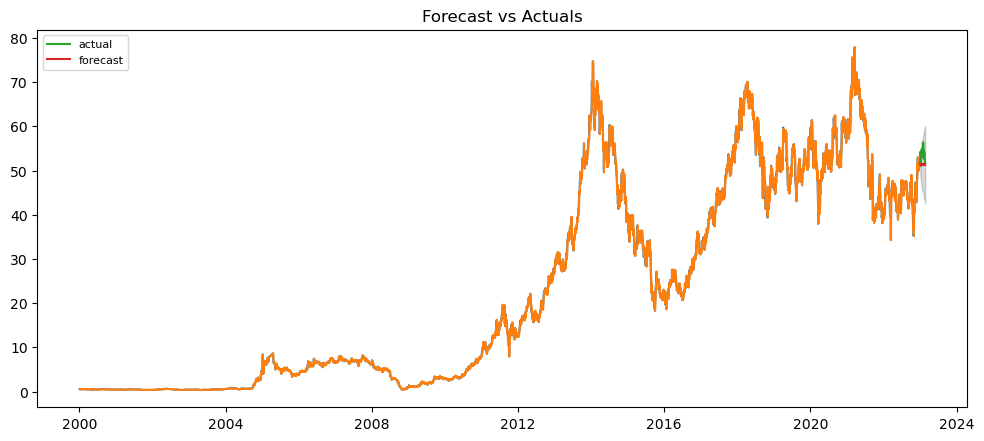

In [101]:
fc = results.forecast(33)
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_Galaxy.index)
lower_series = pd.Series(conf[ : , 0], index=test_Galaxy.index)
upper_series = pd.Series(conf[ : , 1], index=test_Galaxy.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_Galaxy)
plt.plot(test_Galaxy, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

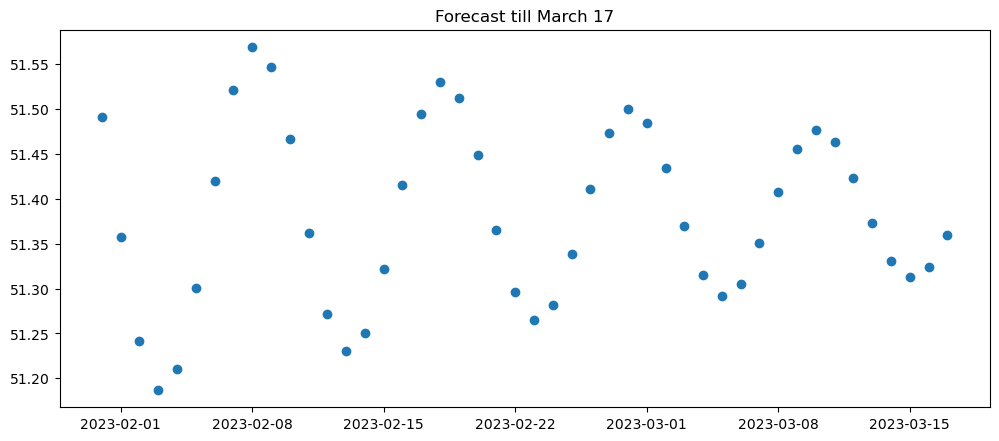

In [97]:
df = pd.DataFrame(pd.date_range(start='2023-01-31', end='2023-03-17'), columns=['Date'])
df = df.set_index(df['Date'])
FC = results.forecast(46)
FC = np.array(FC)
df['forecast'] = FC
plt.figure(figsize=(12,5), dpi=100)
plt.scatter( y = FC, x = df.index)
plt.title('Forecast till March 17')
plt.show()

In [47]:
print (df.loc['2023-03-13'].values)
print (df.loc['2023-03-15'].values)
print (df.loc['2023-03-17'].values)

[Timestamp('2023-03-13 00:00:00') 51.37246554166069]
[Timestamp('2023-03-15 00:00:00') 51.312410237693996]
[Timestamp('2023-03-17 00:00:00') 51.359932541292835]


# Hang Lung

In [48]:
HL = pd.DataFrame()
HL = pd.read_excel('Data2_Ex4.xlsx', sheet_name = '0101.HK')

In [49]:
HL.isnull().sum()

Date       0
Open      82
High      82
Low       82
Close     82
Price     82
Volume    82
dtype: int64

In [50]:
HL = HL.interpolate(method='linear', axis=0, limit=None)

In [51]:
HL.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Price     0
Volume    0
dtype: int64

In [52]:
HL['Date'] = pd.to_datetime(HL['Date'])
HL = HL.set_index(HL['Date'])

df = pd.DataFrame()
df['Price'] = HL['Price']

train_HL = df['2000-01-03':'2022-12-31']
test_HL  = df['2023-01-01': ]

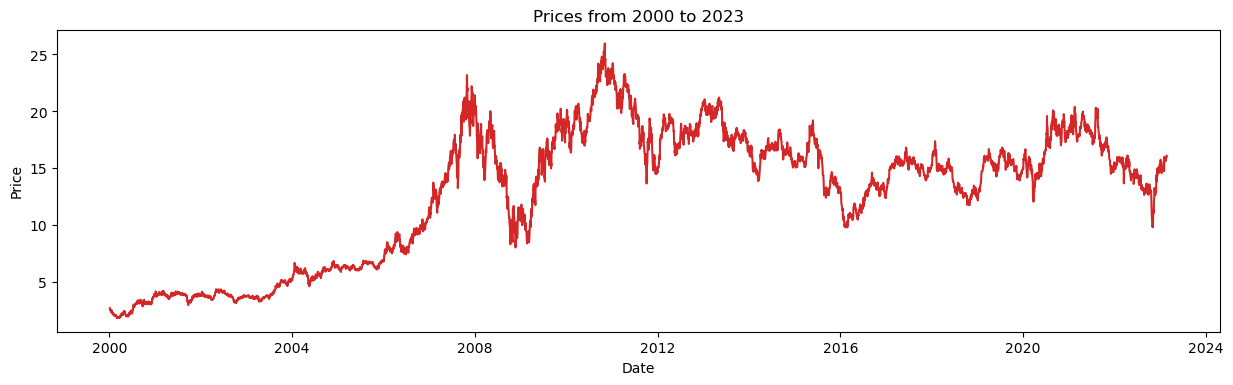

In [53]:
import matplotlib.pyplot as plt 
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Price', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_df(HL, x=HL['Date'], y=HL['Price'], title='Prices from 2000 to 2023')

In [54]:
#Test to see if data is stationary

from statsmodels.tsa.stattools import adfuller

print("p-value:", adfuller(df.dropna())[1])

p-value: 0.22047466723773684


In [55]:
diff_1 = HL.diff().Price.dropna()
print("p-value:", adfuller(diff_1.dropna())[1])

p-value: 0.0


ACF and PACF plots


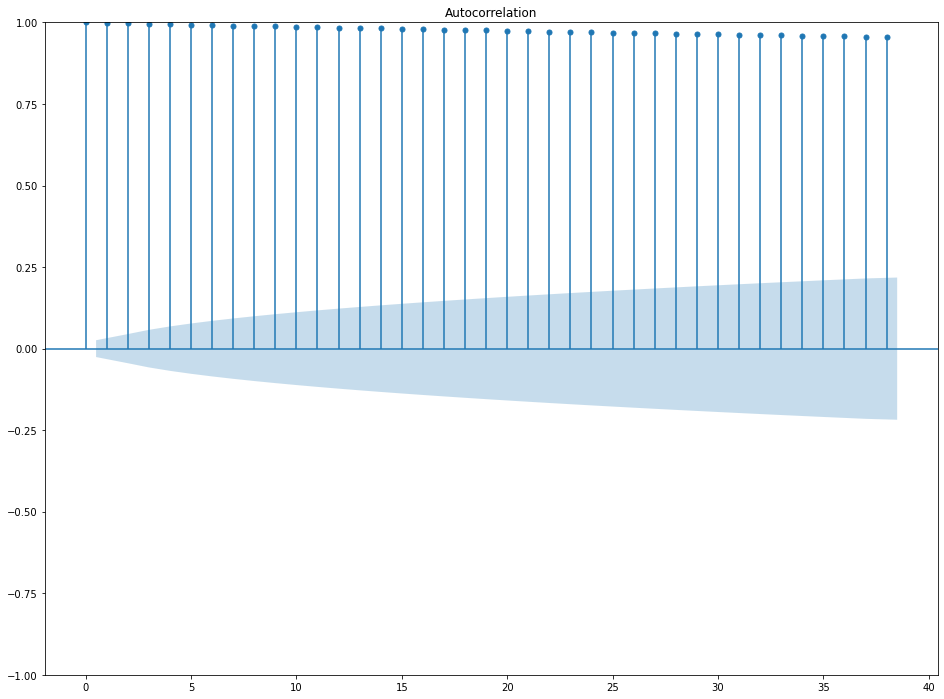

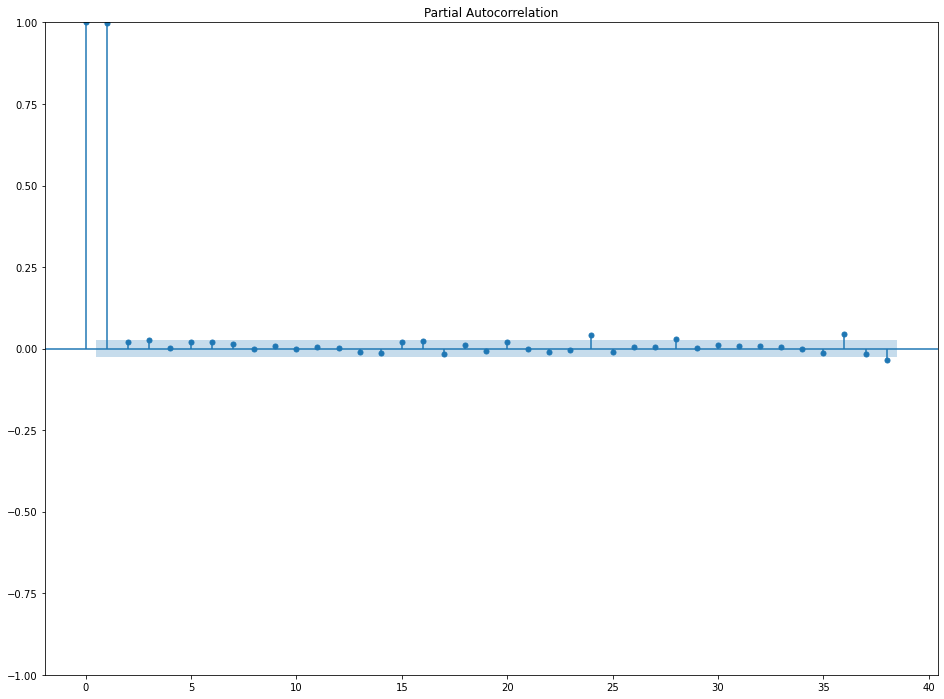

In [56]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df) 

from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df, method = "ols")

print("ACF and PACF plots")

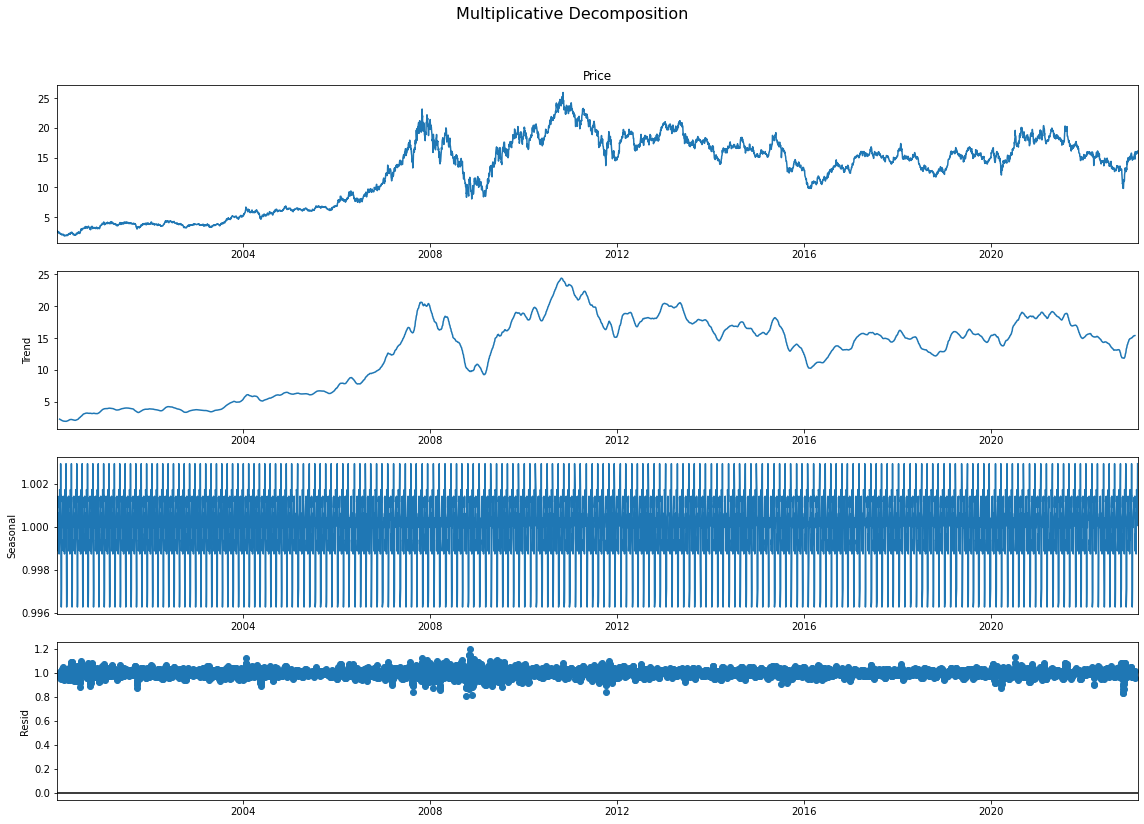

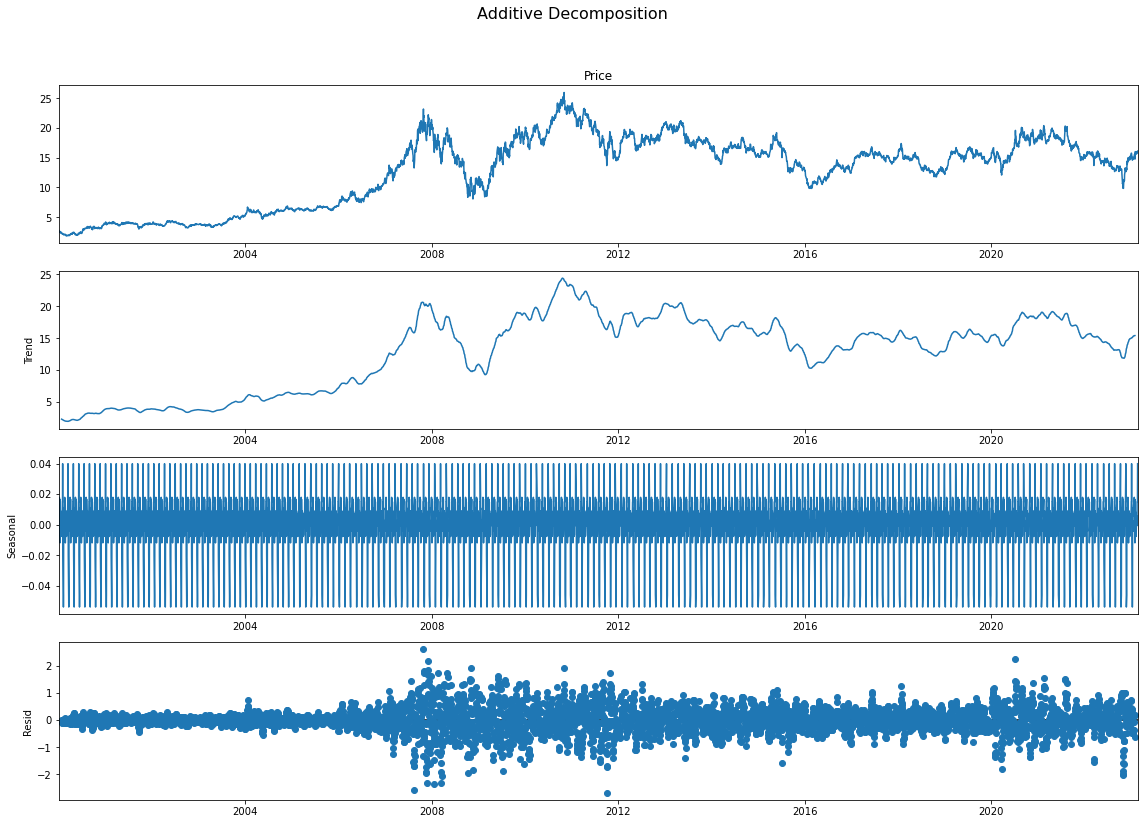

In [57]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(df['Price'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df['Price'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

In [58]:
arima = am(train_HL.Price)
arima.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1860.872, Time=6.58 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1864.516, Time=1.58 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1863.990, Time=1.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1863.850, Time=3.94 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1862.854, Time=0.91 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1858.868, Time=11.11 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1861.741, Time=2.71 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1857.024, Time=11.84 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1863.945, Time=1.86 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1861.945, Time=1.31 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1855.550, Time=4.62 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1862.204, Time=0.84 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1862.343, Time=2.46 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1862.317, Time=2.32 sec
 ARIMA(1,1,2)(0,0,0)[0]        

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5749
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -924.775
Date:                Tue, 07 Mar 2023   AIC                           1855.550
Time:                        08:32:36   BIC                           1875.519
Sample:                             0   HQIC                          1862.500
                               - 5749                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9087      0.033     27.572      0.000       0.844       0.973
ma.L1         -0.9272      0.030    -31.314      0.000      -0.985      -0.869
sigma2         0.0808      0.001     96.906      0.000       0.079       0.082
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):              5005.88
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               4.11   Skew:                             0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [103]:
import statsmodels.api as sm
mod = sm.tsa.arima.ARIMA(train_HL.Price, order = (1,1,1))
results = mod.fit()
print (results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 5749
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -924.775
Date:                Tue, 07 Mar 2023   AIC                           1855.550
Time:                        09:15:42   BIC                           1875.519
Sample:                             0   HQIC                          1862.500
                               - 5749                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9087      0.033     27.572      0.000       0.844       0.973
ma.L1         -0.9272      0.030    -31.314      0.000      -0.985      -0.869
sigma2         0.0808      0.001     96.906      0.0

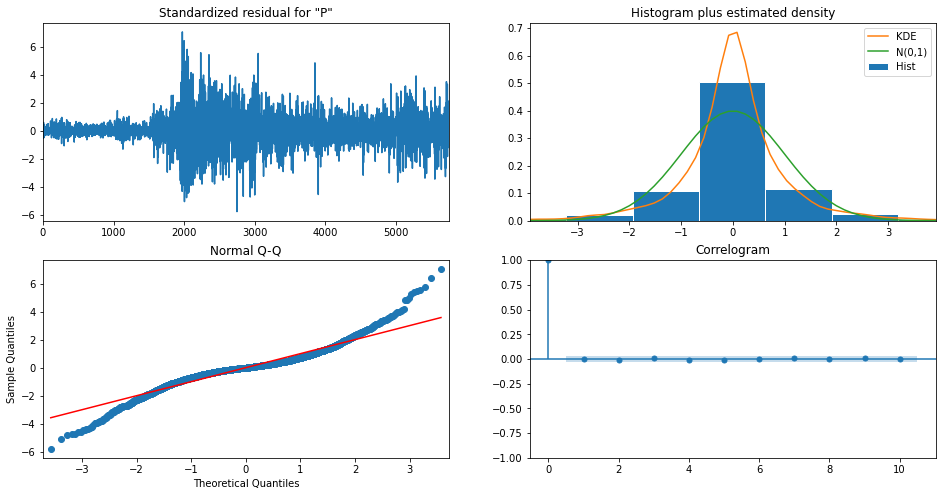

In [60]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

<AxesSubplot:xlabel='Date'>

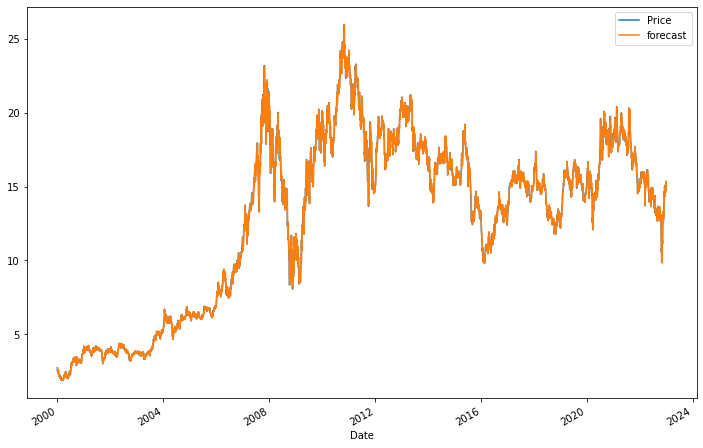

In [61]:
train_HL['forecast']=results.predict(start=1,end=5748, Dynamic = False)
train_HL[['Price','forecast']].plot(figsize=(12,8))

In [62]:
forecast_accuracy(train_HL.forecast, train_HL.Price)

{'mape': 1.4986463615978578}

In [104]:
fc = results.forecast(33) 
forecast_accuracy(fc.values, test_HL.Price)

{'mape': 3.308485917402954}

In [105]:
fc = results.get_forecast(33)  
conf = fc.conf_int(alpha=0.05)

In [106]:
conf = np.array(conf)

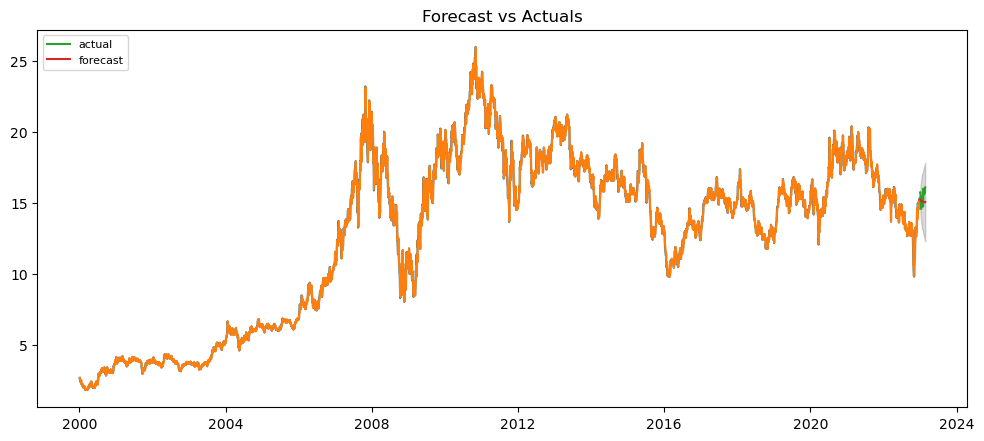

In [107]:
fc = results.forecast(33)
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_HL.index)
lower_series = pd.Series(conf[ : , 0], index=test_HL.index)
upper_series = pd.Series(conf[ : , 1], index=test_HL.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_HL)
plt.plot(test_HL, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

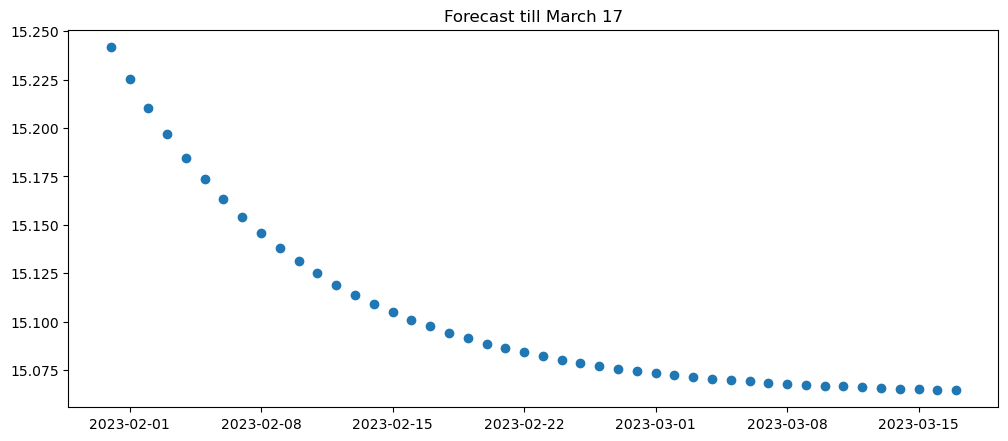

In [108]:
df = pd.DataFrame(pd.date_range(start='2023-01-31', end='2023-03-17'), columns=['Date'])
df = df.set_index(df['Date'])
FC = results.forecast(46)
FC = np.array(FC)
df['forecast'] = FC
plt.figure(figsize=(12,5), dpi=100)
plt.scatter( y = FC, x = df.index)
plt.title('Forecast till March 17')
plt.show()

In [68]:
print (df.loc['2023-03-13'].values)
print (df.loc['2023-03-15'].values)
print (df.loc['2023-03-17'].values)

[Timestamp('2023-03-13 00:00:00') 15.065717896672437]
[Timestamp('2023-03-15 00:00:00') 15.065099646379004]
[Timestamp('2023-03-17 00:00:00') 15.064589134915384]
